<a href="https://colab.research.google.com/github/Yogeshkrishn/Appliances-Energy-Prediction-/blob/main/Appliances_Energy_Prediction_Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data-driven prediction of energy use of appliances
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.

Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters).

- date time year-month-day hour:minute:second
- Appliances, energy use in Wh (Dependent variable)
- lights, energy use of light fixtures in the house in Wh (Drop this column)
- T1, Temperature in kitchen area, in Celsius
- RH1, Humidity in kitchen area, in % 
- T2, Temperature in living room area, in Celsius 
- RH2,Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH3, Humidity in laundry room area, in % 
- T4, Temperature in office room, in Celsius 
- RH4,Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH5, Humidity in bathroom, in % 
- T6, Temperature outside the building (north side), in Celsius
- RH6, Humidity outside the building (north side), in %
- T7, Temperature in ironing room , in Celsius
- RH7, Humidity in ironing room, in % 
- T8, Temperature in teenager room 2, in Celsius 
- RH8,Humidity in teenager room 2, in %
- T9, Temperature in parents room, in Celsius
- RH9, Humidity in parents room, in % 
- To, Temperature outside (from Chievres weather station), in Celsius 
- Pressure (from Chievres weather station), in mm Hg RHout, 
- Humidity outside (from Chievres weather station), in %
- Wind speed (from Chievres weather station), in m/s
- Visibility (from Chievres weather station), in km
- Tdewpoint (from Chievres weather station), Â°C
- rv1, Random variable 1, nondimensional
- rv2, Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis,rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of
weather data.

In the age of smart homes, ability to predict energy consumption can not only save money for end user but can also help in generating money for user by giving excess energy back to Grid (in case of solar panels usage). In this case regression analysis will be used to predict Appliance energy usage based on data collected from various sensors

#Process Outline

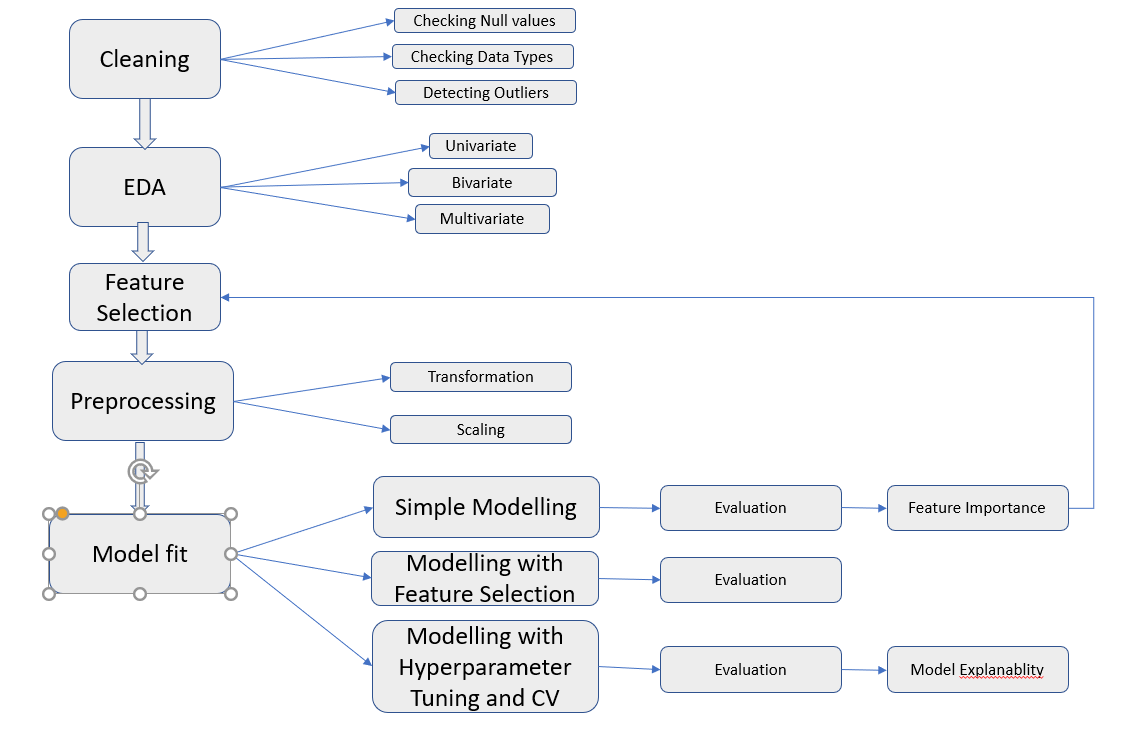

#Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor

%matplotlib inline

#Getting the Data

In [5]:
df=pd.read_csv('/content/drive/MyDrive/My Drive/Capstone Project/Appliances Energy Prediction - Yogesh/data_application_energy.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data X ray

In [7]:
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [9]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


##Checking for null values

In [10]:
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

 - Date column is only used for understanding the consumption vs date time behavior and given this is not a time series problem it was removed .

- Number of Independent variables at this stage — 26
- Number of Dependent variable at this stage — 1
-Total number of rows — 19735
- All the features have numerical values. There are no categorical or ordinal features.
--Number of missing values & null values = 0

#EDA

###Target Variable Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


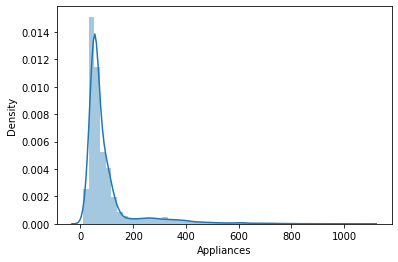

In [11]:
sns.distplot(df['Appliances'])

##Outlier Removal

Clearly we can see some outlier , so we will have to remove them

In [12]:
T=df[['Appliances']]
Q1 = T.quantile(0.25)
Q3 = T.quantile(0.75)
IQR = Q3 - Q1
print("Outlier threshold of Appliances ",IQR)

dfOutlier=T.describe()
outlierSet=set()
for column in dfOutlier.columns:
    Q1 = dfOutlier[column]['25%']
    Q3 = dfOutlier[column]['75%']
    IQR = Q3 - Q1
    outlierDf= ( ((T[column] < (Q1 - 1.5 * IQR)) |(T[column] > (Q3 + 1.5 * IQR))) )
    outlierSet.update(set(outlierDf[outlierDf==True].index))
        

df.drop(outlierSet, inplace=True, axis=0)

Outlier threshold of Appliances  Appliances    50.0
dtype: float64


In [13]:
print(f'After removing Outliers {df.shape}')

After removing Outliers (17597, 29)


##UniVariate Analysis

In [14]:
temp_col=['T1','T2','T3','T4','T5','T6','T7','T8','T9']
hum_col=['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9']
other_col=['T_out', 'Press_mm_hg', 'RH_out', 'Windspeed','Visibility', 'Tdewpoint', 'rv1', 'rv2']

We divide our df in three varibales type, temperature Humidity and Other, so we can do a better analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

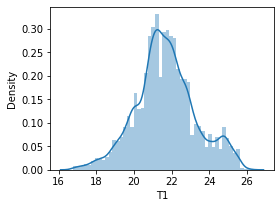

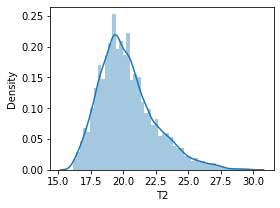

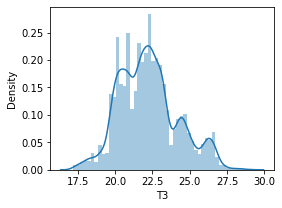

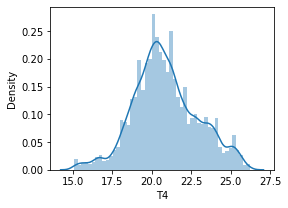

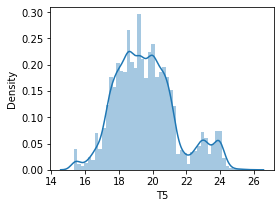

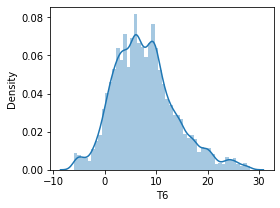

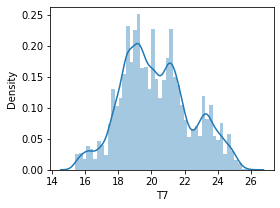

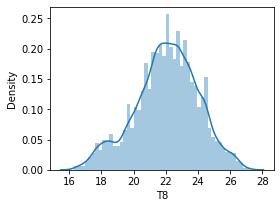

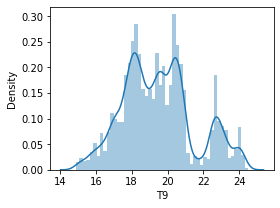

In [15]:
for i in temp_col:
  plt.figure(figsize=(4,3))
  sns.distplot(df[i])

there are no , outliers otherwise we would have seen skewness in the in the Temp data.
Mostly they follow a bell curve

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

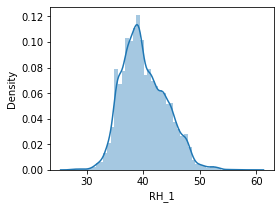

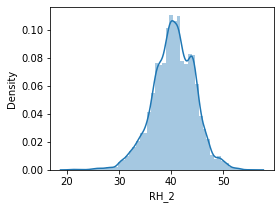

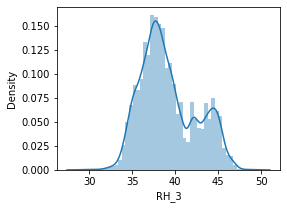

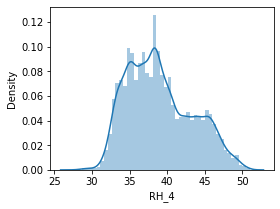

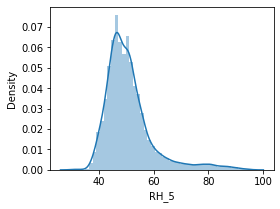

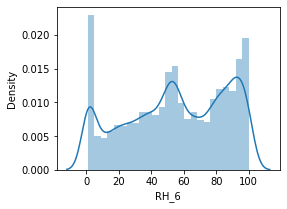

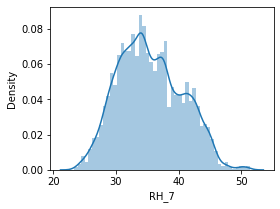

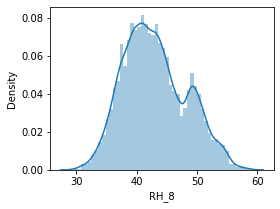

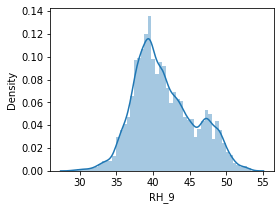

In [16]:
for i in hum_col:
  plt.figure(figsize=(4,3))
  sns.distplot(df[i])

There are not outliers , but we will have to check as all variable here in Relative humidity does not have Bell curve distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

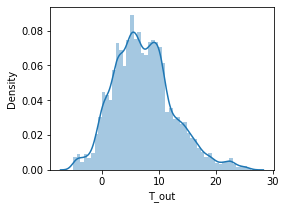

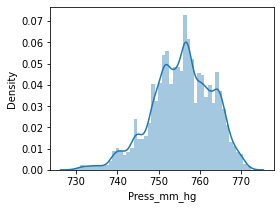

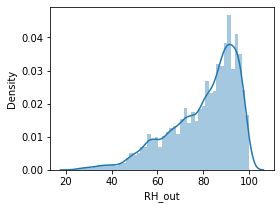

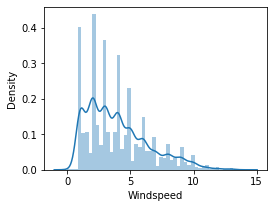

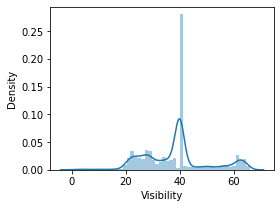

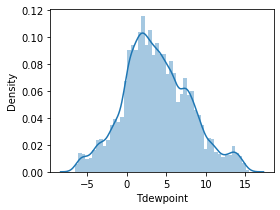

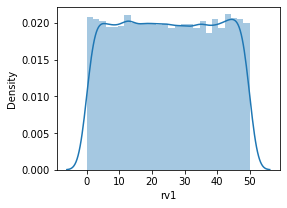

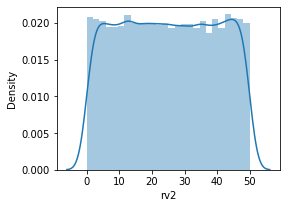

In [17]:
for i in other_col:
  plt.figure(figsize=(4,3))
  sns.distplot(df[i])

Distribution of other varibles also dont have bell curve distribution, we may have to use Transformations on it if we use in the final model

- All humidity values except RH_6 and RH_out follow a Normal distribution, i.e.all the readings from sensors inside the home are from a Normal distribution.
- Similarly, all temperature readings follow a Normal distribution except for T9.
- Out of the remaining columns, we can see that Visibility, Windspeed and Appliances are skewed.
- The random variables rv1 and rv2 have more or less the same values for all the recordings.
- The output variable Appliances has most values less than 200Wh, showing that high energy consumption cases are very low.
- No column has a distribution like the target variable Appliances.
Hence, there are no feature independent feature with a linear relationship with the target.

##Bivariate Analysis

we can create the columnns for weekday and hour of day , to look for hourwise and Weekay wise analysis

In [18]:
import datetime 
def hour_fet(x):
   return pd.to_datetime(x).hour

def weekday_fet(x):
   return pd.to_datetime(x).weekday()
   
df['hour']=df['date'].apply(hour_fet)
df['weekday']=df['date'].apply(weekday_fet)

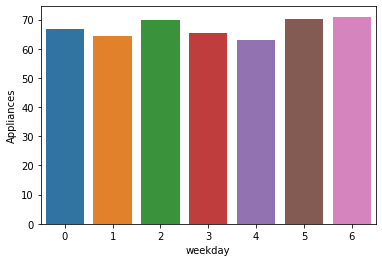

In [19]:
weekday_eng=pd.DataFrame(df.groupby('weekday')['Appliances'].mean()).reset_index()
sns.barplot(x=weekday_eng['weekday'],y=weekday_eng['Appliances'])

Here we see that , that consumption is higher on weekends , ie week number 0, 6, 5

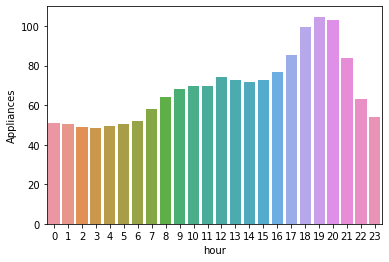

In [20]:
hour_eng=pd.DataFrame(df.groupby('hour')['Appliances'].mean()).reset_index()
sns.barplot(x=hour_eng['hour'],y=hour_eng['Appliances'])

Here we see that the coonsumption is high in the evening time , ie hour between 16 and 20 

Next we can create average , temp and avg hum for indoor humidity and temperature

In [21]:
df['avg_temp']=0
for i in temp_col:
  df['avg_temp']=df['avg_temp']+df[i]
df['avg_temp']=df['avg_temp']/len(temp_col)

df['avg_hum']=0
for i in hum_col:
  df['avg_hum']=df['avg_hum']+df[i]
df['avg_hum']=df['avg_hum']/len(hum_col)



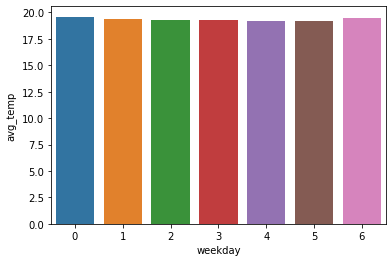

In [22]:
weekday_temp=pd.DataFrame(df.groupby('weekday')['avg_temp'].mean()).reset_index()
sns.barplot(x=weekday_temp['weekday'],y=weekday_temp['avg_temp'])

this shows that the avg indoor temperature does not change with the week 

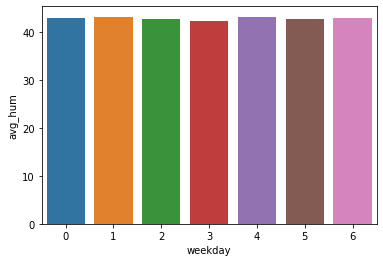

In [23]:
weekday_hum=pd.DataFrame(df.groupby('weekday')['avg_hum'].mean()).reset_index()
sns.barplot(x=weekday_hum['weekday'],y=weekday_hum['avg_hum'])

this shows that the avg indoor Humidity does not change with the week 

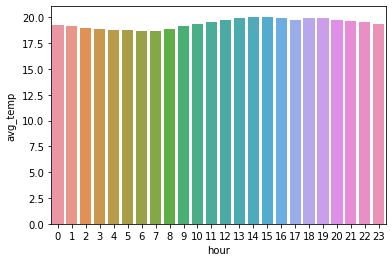

In [24]:
hour_temp=pd.DataFrame(df.groupby('hour')['avg_temp'].mean()).reset_index()
sns.barplot(x=hour_temp['hour'],y=hour_temp['avg_temp'])

this shows that the avg indoor temperature does not change much with the hour in day. Although we have seen that temperature of specific room might be varying.

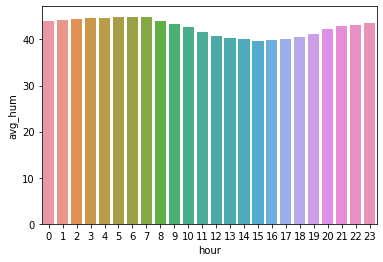

In [25]:
hour_hum=pd.DataFrame(df.groupby('hour')['avg_hum'].mean()).reset_index()
sns.barplot(x=hour_hum['hour'],y=hour_hum['avg_hum'])

this shows that the avg indoor humidity does not change much with the hour in day. Although we have seen that Humidity of specific room might be varying.

All over we can say, the idea of average temp and average humidity might not give any significant results

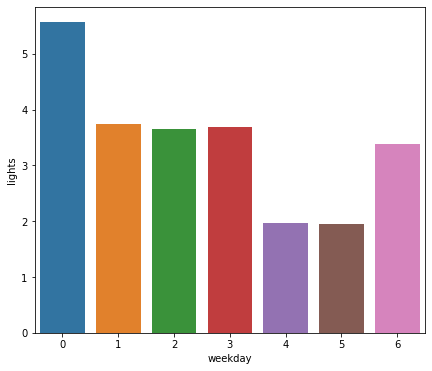

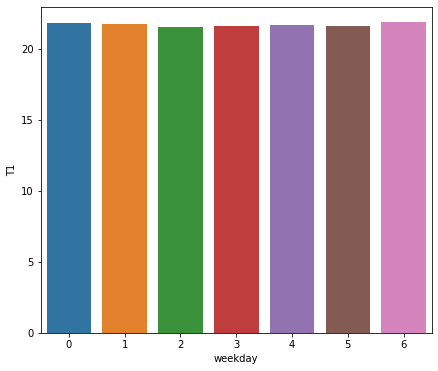

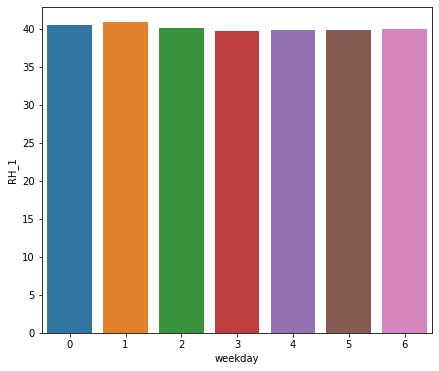

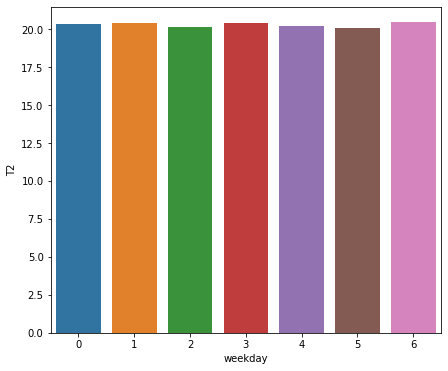

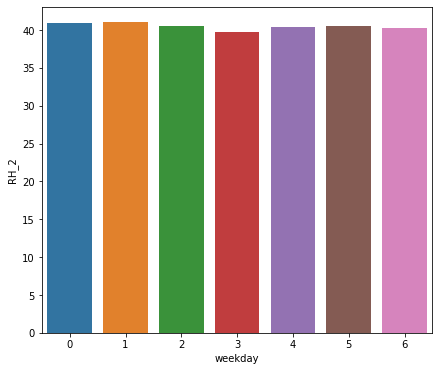

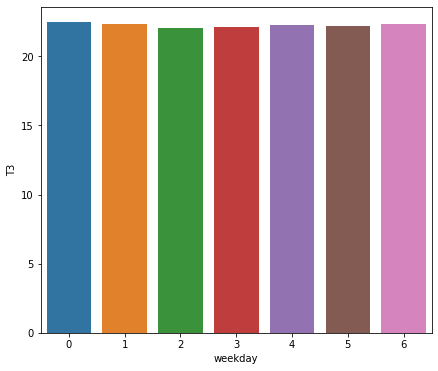

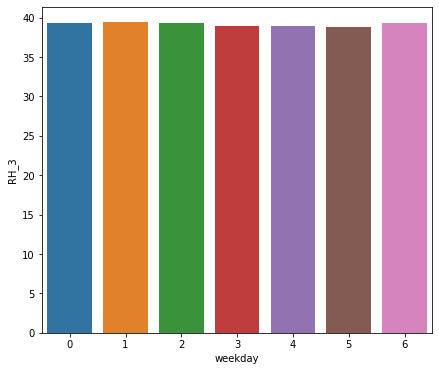

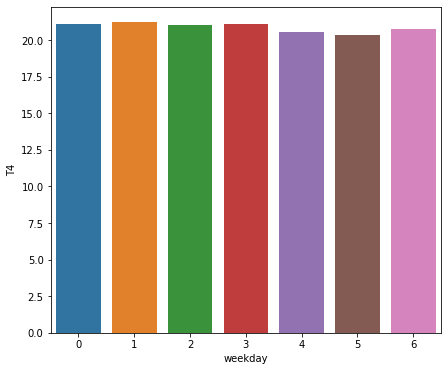

In [26]:
for i in df.columns[2:10]:
  plt.figure(figsize=(7,6))
  df_week=pd.DataFrame(df.groupby('weekday')[i].mean()).reset_index()
  sns.barplot(x=df_week['weekday'],y=df_week[i])

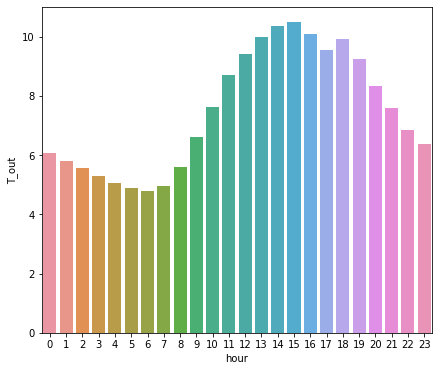

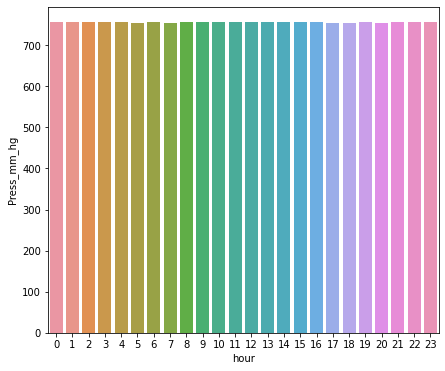

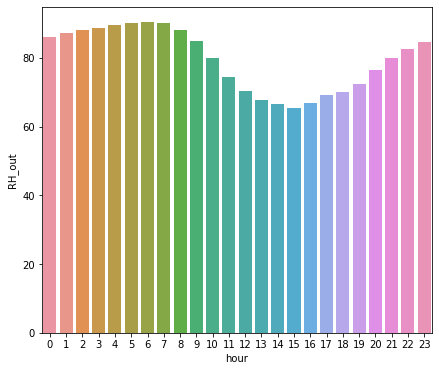

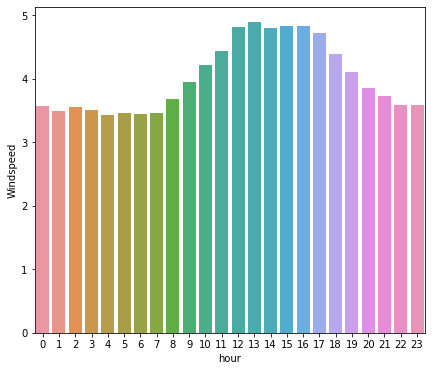

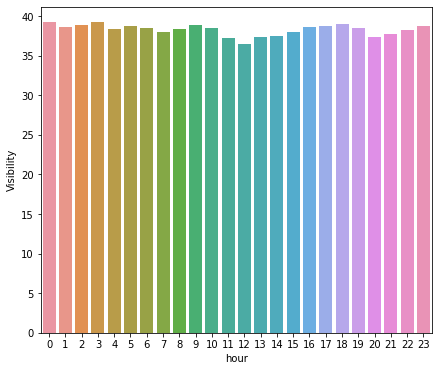

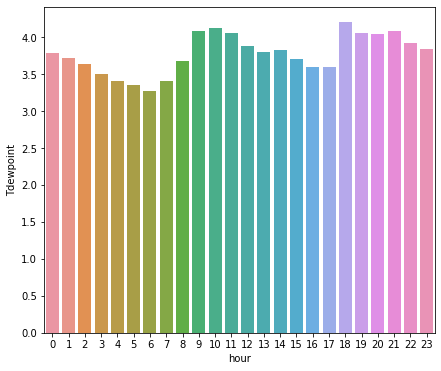

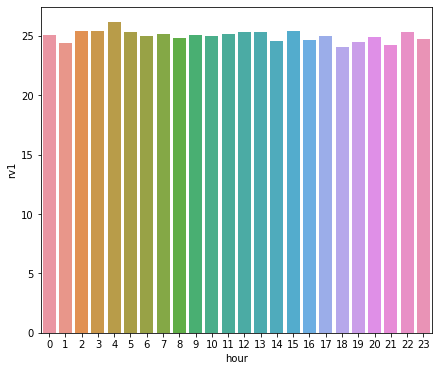

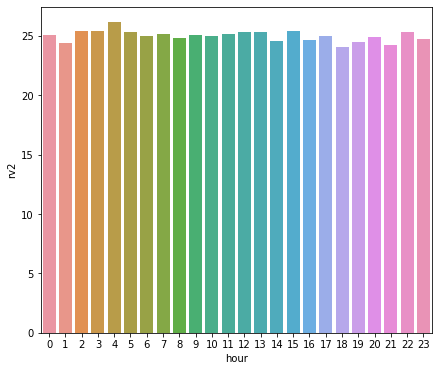

In [27]:
for i in other_col:
  plt.figure(figsize=(7,6))
  df_hour=pd.DataFrame(df.groupby('hour')[i].mean()).reset_index()
  sns.barplot(x=df_hour['hour'],y=df_hour[i])

from here we can say that outside temp and humidity varies very much accross hour , which is expected. 
Same for windspeed, and tdewpoint.

In [28]:
#lets create features based on consumption level.
# is for a particular 10 mins the enerygy consumption is far greater than hour avg then it will be high consumtion or else
'''def consump_level(x):
  if x>25:
    return 'high consump'
  elif x<(-25):
    return 'low consump'

df_1=df.join(hour_eng,on='hour',rsuffix='_all')
df_1['hourly_diff']=df_1['Appliances']-df_1['Appliances_all']
df_1['level']=df_1['hourly_diff'].apply(consump_level)'''

#Although this way we can make a very related variable , but it does not make sense , creating a varibale totally based on target varibale

"def consump_level(x):\n  if x>25:\n    return 'high consump'\n  elif x<(-25):\n    return 'low consump'\n\ndf_1=df.join(hour_eng,on='hour',rsuffix='_all')\ndf_1['hourly_diff']=df_1['Appliances']-df_1['Appliances_all']\ndf_1['level']=df_1['hourly_diff'].apply(consump_level)"

##MultiVariate Analysis

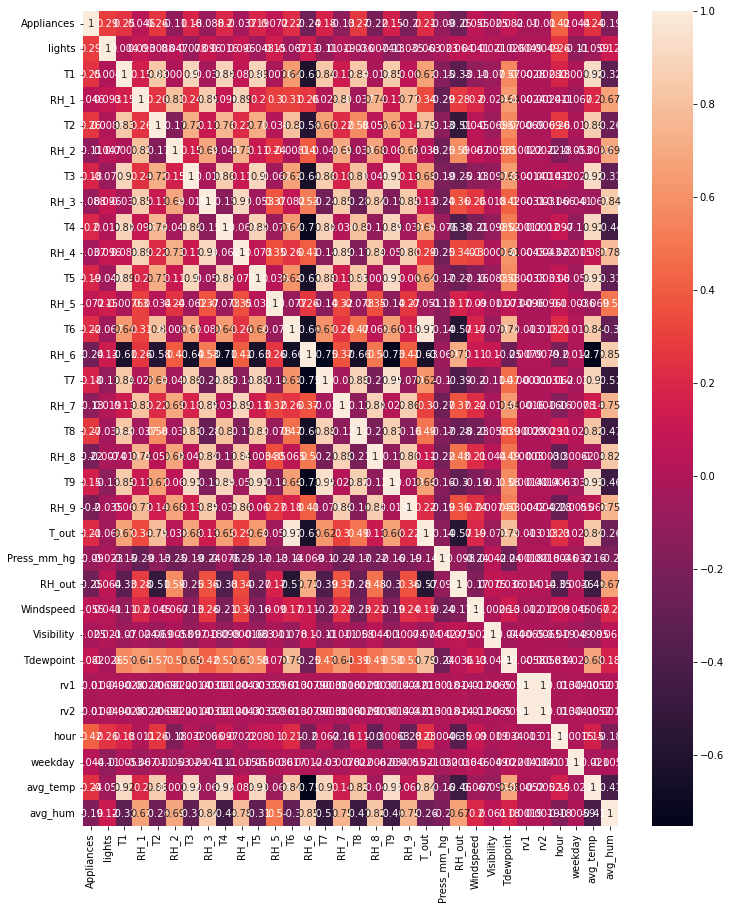

In [29]:
plt.figure(figsize=(12,15))
sns.heatmap(df.corr(),annot=True)

from here we see a particular square region as highly correlated , as they are different temperature of same house ,and humidity of same house

In [30]:
App_corr=[]
for i in df.columns[1:]:
  
  App_corr.append([i,df[['Appliances',i]].corr().iloc[1][0]])

App_corr=pd.DataFrame(App_corr,columns=['feature','correlation']).sort_values(['correlation'],ascending=False)
App_corr

,feature,correlation
0,Appliances,1.000000
28,hour,0.416503
1,lights,0.291109
16,T8,0.268293
4,T2,0.264739
2,T1,0.248221
30,avg_temp,0.242225
12,T6,0.223875
20,T_out,0.213651
8,T4,0.195689


This way we can get the features which are most correlated with our target variable

In [31]:
df=df.join(weekday_eng,how='left',on='weekday',rsuffix='_')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,weekday,avg_temp,avg_hum,weekday_,Appliances_
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,17,0,17.167407,50.910741,0,66.683652
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,17,0,17.149630,50.827222,0,66.683652
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,17,0,17.103704,50.628889,0,66.683652
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,17,0,17.067037,50.574815,0,66.683652
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,17,0,17.070741,50.732963,0,66.683652


#Preparing the Data

In [32]:
X_df=df.drop(['Appliances','date','weekday','weekday_'],axis=1)
y=df['Appliances']

In [34]:
X_df

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,avg_temp,avg_hum,Appliances_
0,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.200000,48.900000,17.033333,45.530000,6.600000,733.50,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,17,17.167407,50.910741,66.683652
1,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.200000,48.863333,17.066667,45.560000,6.483333,733.60,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,17,17.149630,50.827222,66.683652
2,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.200000,48.730000,17.000000,45.500000,6.366667,733.70,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,17,17.103704,50.628889,66.683652
3,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.100000,48.590000,17.000000,45.400000,6.250000,733.80,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,17,17.067037,50.574815,66.683652
4,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.100000,48.590000,17.000000,45.400000,6.133333,733.90,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,17,17.070741,50.732963,66.683652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19727,0,25.500000,47.456667,26.000000,42.320000,27.663333,40.693333,24.700000,45.560000,23.200000,52.126667,25.833333,1.000000,24.468571,44.668571,24.540000,51.500000,23.200000,46.718000,22.966667,755.25,55.000000,2.833333,22.166667,13.366667,1.796395,1.796395,16,25.011693,41.338138,63.131687
19728,0,25.600000,47.193333,25.968571,42.528571,27.390000,41.030000,24.700000,45.626667,23.200000,52.260000,25.963333,1.000000,24.500000,44.718000,24.600000,50.863333,23.200000,46.751429,23.000000,755.20,55.000000,3.000000,22.000000,13.400000,18.248201,18.248201,17,25.013545,41.330148,63.131687
19729,0,25.533333,46.860000,25.978000,42.534000,27.323333,41.090000,24.700000,45.626667,23.200000,52.326667,25.630000,1.000000,24.500000,44.764286,24.666667,50.445000,23.200000,46.745000,22.866667,755.20,55.333333,3.166667,22.833333,13.366667,16.966162,16.966162,17,24.970148,41.265735,63.131687
19730,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.700000,50.074000,23.200000,46.790000,22.733333,755.20,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,17,24.861481,41.122561,63.131687


#Modelling And Results

##Fittng Models without Hyper Parameter tuning or CV

In [ ]:
result=[]
#This function will implement a simple model of our choice , without tuning or Cross Validation

def simple_model(Model,X):

#spliting the Data into training and test

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
  
#scaling the data

  scaler=StandardScaler()
  X_train=scaler.fit_transform(X_train)
  X_test=scaler.transform(X_test)

#we have a skewness in our target variable, and we transform our data to remove it

  y_train_trans=np.log10(y_train)

#Fitting the model

  model=Model()
  model.fit(X_train,y_train_trans)

#evaluation with Root mean square error and R2 score

  y_train_pred=model.predict(X_train)
  y_pred=model.predict(X_test)
  train_err=np.sqrt(mean_squared_error(10**y_train_pred,y_train))
  test_err=np.sqrt(mean_squared_error(10**y_pred,y_test)) 
  train_r2=r2_score(10**y_train_pred,y_train)
  test_r2=r2_score(10**y_pred,y_test)

  
  #df_res=pd.DataFrame({'Train Error':train_err,'Test Error':test_err,'train r2':train_r2,'test r2':test_r2},index=[1])
  
  result.append([train_err,test_err,train_r2,test_r2])
  return model

  

In [ ]:
##This function will help us creating a Resulting Data Frame, of Root mean squared error and R2 score

def eval_data(x):  
  simple_model(LinearRegression,x)
  simple_model(RandomForestRegressor,x)
  simple_model(GradientBoostingRegressor,x)
  simple_model(Ridge,x)
  simple_model(SVR,x)
  simple_model(XGBRegressor,x)

  models=['Linear Regression','Random Forest','Gradient Boosting','Ridge','SVR','XGB Regreessor']
  df_res=pd.DataFrame(result,columns=['Train Error','Test Error','Train R2','Tets R2'])
  df_res['Model']=models
  df_res=df_res.set_index(['Model'])

  return df_res

#eval_data(X_df)

- From here we see that Random Forest fits best on the data
- We can use this model to get the feature importance of variables


####Checking with feature Importance

Dropping some values based on feature importance, we choose Random forest from above as our best model, and based on that we see which feature are more relevant 

In [ ]:
  features = X_df.columns
  importances = simple_model(RandomForestRegressor).feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(10,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

##Fitting the model by dropping some variables

Based on the above result we can drop some columns

In [ ]:
X_fet=df.drop(['Appliances','weekday','rv1','rv2','T1','Visibility','T3','T_out','T6','RH_4','avg_temp','Windspeed','avg_hum','RH_7','T2',
           'T5','date','RH_1','RH_2','RH_8','RH_5','RH_6','T4','RH_out','RH_3','Tdewpoint'],axis=1)
result=[]

In [ ]:
eval_data(X_fet)

We observe here that , we dont have any improvement ove the previous model where we used all features

We observe that scores only slightly improve.
Linear Regression and Ridge are the worst performing models as we didn’t see any significant correlation between independent variables and the target variable
We further perform hyperparameter tuning on these models to get the best scores


##Fittng Models with Hyper Parameter tuning and CV

In [ ]:
res_tuned=[]
def tuned_model(Model,params,X):
   
  #spliting the Data into training and test

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
  
  #scaling the data

  scaler=StandardScaler()
  X_train=scaler.fit_transform(X_train)
  X_test=scaler.transform(X_test)
 
  #we have a skewness in our target variable, and we transform our data to remove it

  y_train_trans=np.log10(y_train)

  #Using Grid Search 

  model=Model()
  grid=GridSearchCV(model,params,scoring='r2',cv=5,verbose=1,n_jobs=5)

  #Fitting the Model

  grid.fit(X_train,y_train_trans)

  #Evaluation

  y_train_pred=grid.predict(X_train)
  y_pred=grid.predict(X_test)
  train_err=np.sqrt(mean_squared_error(10**y_train_pred,y_train))
  test_err=np.sqrt(mean_squared_error(10**y_pred,y_test)) 

  train_r2=r2_score(10**y_train_pred,y_train)
  test_r2=r2_score(10**y_pred,y_test)

  res_tuned.append([train_err,test_err,train_r2,test_r2])

  return y_train_pred,y_pred

In [ ]:
def eval_tuned_data(X):

  param_grid_lin = {
              "fit_intercept": [True, False]
              }
  tuned_model(LinearRegression,param_grid_lin,X)
  print('linear')

  param_grid_rf= { 
        "n_estimators"      : [10,20,30],
        "max_features"      : ["auto", "sqrt", "log2"],
        "min_samples_split" : [2,4,8],
        "bootstrap": [True, False],
        }
  tuned_model(RandomForestRegressor,param_grid_rf,X)
  print('random')

  param_grid_gbm = {
    "learning_rate": [0.01, 0.1],
    "max_depth":[5,10],
    "max_features":["log2","sqrt"],
    "n_estimators":[50,100]
    }
  tuned_model(GradientBoostingRegressor,param_grid_gbm,X)
  print('gbm')

  param_grid_ridge={'alpha':[1,0.1,0.01]}
  tuned_model(Ridge,param_grid_ridge,X)
  print('ridge')

  '''param_grid_svr = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,10]}
  tuned_model(SVR,param_grid_svr)
  print('svr')'''

  param_grid_xg = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05], #so called `eta` value
              'max_depth': [5,15],
              'min_child_weight': [4],
              'silent': [1],
              'n_estimators': [500]}
  tuned_model(XGBRegressor,param_grid_xg,X)
  print('xgb')

  tuned_models=['Linear Regression','Random Forest','Gradient Boosting','Ridge','XGB Regreessor']
  df_res_tun=pd.DataFrame(res_tuned,columns=['Train Error','Test Error','Train R2','Tets R2'])
  df_res_tun['Model']=tuned_models
  df_res_tun=df_res_tun.set_index(['Model'])

  return df_res_tun



In [ ]:
df_res_tun=eval_tuned_data(X_df)

In [ ]:
df_res_tun

##Modelling using Ensemble(Simple Average)

In [ ]:
param_grid_rf= { 
      "n_estimators"      : [10,20,30],
      "max_features"      : ["auto", "sqrt", "log2"],
      "min_samples_split" : [2,4,8],
      "bootstrap": [True, False],
      }
y_tr_ran,y_pred_ran=tuned_model(RandomForestRegressor,param_grid_rf,X_fet)
print('random')

param_grid_gbm = {
  "learning_rate": [0.01, 0.1],
  "max_depth":[5,10],
  "max_features":["log2","sqrt"],
  "n_estimators":[50,100]
  }
y_tr_gbm,y_pred_gbm=tuned_model(GradientBoostingRegressor,param_grid_gbm,X_fet)
print('gbm')

param_grid_xg = {'nthread':[4], #when use hyperthread, xgboost may become slower
            'objective':['reg:squarederror'],
            'learning_rate': [.03, 0.05], #so called `eta` value
            'max_depth': [5,15],
            'min_child_weight': [4],
            'silent': [1],
            'n_estimators': [500]}
y_tr_xgb,y_pred_xgb=tuned_model(XGBRegressor,param_grid_xg,X_fet)
print('xgb')



In [ ]:
train_pred_avg=pd.DataFrame({'random':10**y_tr_ran,'gbm':10**y_tr_gbm,'xgb':10**y_tr_xgb})
pred_avg=pd.DataFrame({'random':10**y_pred_ran,'gbm':10**y_pred_gbm,'xgb':10**y_pred_xgb})
train_pred_avg['y_train_avg']=(train_pred_avg['random']+train_pred_avg['gbm']+train_pred_avg['xgb'])/3
pred_avg['y_test_avg']=(pred_avg['random']+pred_avg['gbm']+pred_avg['xgb'])/3

train_err=np.sqrt(mean_squared_error(train_pred_avg['y_train_avg'],y_train))
test_err=np.sqrt(mean_squared_error(pred_avg['y_test_avg'],y_test)) 

train_r2=r2_score(train_pred_avg['y_train_avg'],y_train)
test_r2=r2_score(pred_avg['y_test_avg'],y_test)

res_avg=[[train_err,test_err,train_r2,test_r2]]

In [ ]:
pd.DataFrame(res_avg,columns=['Train Error','Test Error','Train R2','Tets R2'])

##Modelling Using Stacking

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_train_trans=np.log10(y_train)

from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

estimators = [
     ('xgb', XGBRegressor()),
    ('gbm', GradientBoostingRegressor()),
    ('random',RandomForestRegressor())
 ]
reg = StackingRegressor(estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=100,
                                          random_state=42),cv=5)

reg.fit(X_train, y_train_trans)


In [ ]:
sy_pred=reg.predict(X_test)
y_train_pred=reg.predict(X_train)
print(np.sqrt(mean_squared_error(10**sy_pred,y_test)))
np.sqrt(mean_squared_error(10**y_train_pred,y_train))
r2_score(10**sy_pred,y_test)

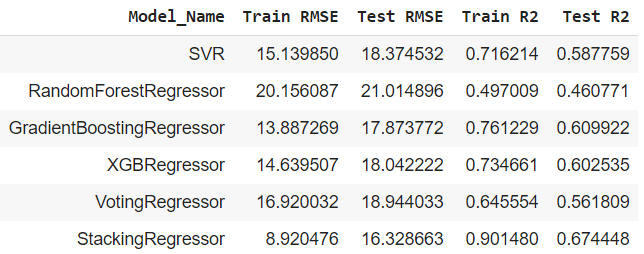

After hyper parameter tuning, we can see that the overfitting has reduced.
Voting Regressor (using weighted average) - did not give better results.
We see best results with the Stacking Regressor.


#Conclusion

- As the first step, we understand the data & checked for null values, and outliers and performed EDA to get better understanding of variables .
- As part of data pre-processing, we performed feature scaling and outlier removal As so we have a Timestamp in our data, we needed to see the periodicity and trend of our dependent and independent variables.
- We tried multiple simple models and multiple advanced models with performed hyper parameter tuning and cross validation.
- Models Built: Linear Regression, SVR, RandomForest, Gradient Boosting XGBoost
- Advanced Models: Stacking Regressor, Voting Regressor, Average Ensemble
Based on our targeted evaluation metric - RMSE and R2 scorel, we chose Stacking Regressor as the suggested model.
